### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os

### Load matlab file

In [2]:
# loadmat aux function to load the matlab save files
# from: https://stackoverflow.com/review/suggested-edits/21667510

import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _has_struct(elem):
        """Determine if elem is an array and if any array item is a struct"""
        return isinstance(elem, np.ndarray) and any(isinstance(
                    e, scipy.io.matlab.mio5_params.mat_struct) for e in elem)

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif _has_struct(elem):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif _has_struct(sub_elem):
                elem_list.append(_tolist(sub_elem).astype(float))
            else:
                elem_list.append(sub_elem.astype(float))
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [3]:
# Matlab code conversion

# Read matlab file instead of excelfile (easier conversion)
data = loadmat('../matlab.mat')

In [4]:
data['data']

{'parameterData': {'resources': {'period': 24,
   'periodDuration': 60,
   'owners': 2,
   'genInBus': array([[0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 1, 1, 1, 1, 1, 1],
          [1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0],
         

In [5]:
data['data']['parameterData']['resources']['genInBus'].astype(float)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
 

### Import Procsim

In [6]:
import procsimulator

from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator

from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.DataFromTomorrow import DataFromTomorrow
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator

### Get community data (consumption, PV production, wind production, total production and netload)

In [7]:
current_path = os.getcwd()
path_steps_seconds = os.path.join(current_path, "..")
path_steps_minutes = "../output/minute"

pv_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
pv_df.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
pv_df['Date'] = pd.to_datetime(pv_df['Date'])
print(pv_df)

                     Date       Demand  PV_Production  Wind_Production  \
0     2022-10-16 00:00:00  1364.623333            0.0      2755.725373   
1     2022-10-16 00:01:00  1364.048333            0.0      2777.570346   
2     2022-10-16 00:02:00  1342.136667            0.0      2798.620373   
3     2022-10-16 00:03:00  1323.410000            0.0      2818.885116   
4     2022-10-16 00:04:00  1310.541667            0.0      2838.374237   
...                   ...          ...            ...              ...   
10074 2022-10-22 23:54:00  1350.063333            0.0     12974.885389   
10075 2022-10-22 23:55:00  1350.000000            0.0     12984.431798   
10076 2022-10-22 23:56:00  1455.931667            0.0     12993.978202   
10077 2022-10-22 23:57:00  1474.323333            0.0     13003.524600   
10078 2022-10-22 23:58:00   978.400000            0.0     13013.070993   

         Production       Netload  
0       2755.725373  -1391.102040  
1       2777.570346  -1413.522012  
2  

### Downsample data to 1 hour

In [8]:
pv_df = pv_df.resample('1H', on='Date').mean()
pv_df = pv_df.reset_index()
print(pv_df)

                   Date       Demand  PV_Production  Wind_Production  \
0   2022-10-16 00:00:00  1147.887028            0.0      3025.292680   
1   2022-10-16 01:00:00  1050.334972            0.0      2687.639917   
2   2022-10-16 02:00:00  1638.870250            0.0      2417.165755   
3   2022-10-16 03:00:00  1852.895528            0.0      2471.580335   
4   2022-10-16 04:00:00  3667.408667            0.0      1694.983397   
..                  ...          ...            ...              ...   
163 2022-10-22 19:00:00  4700.062583            0.0     10449.661167   
164 2022-10-22 20:00:00  2757.668444            0.0     11022.525277   
165 2022-10-22 21:00:00  5525.317972            0.0     11595.369077   
166 2022-10-22 22:00:00  2184.109278            0.0     12168.192568   
167 2022-10-22 23:00:00  1203.814096            0.0     12736.222502   

       Production       Netload  
0     3025.292680  -1877.405652  
1     2687.639917  -1637.304945  
2     2417.165755   -778.295505  

In [9]:
data['data']['storage']['limit'][0].shape

(24, 4)

### Concatenate loads, generators and storages in order to have 1 week instead of just 1 day

In [10]:

arrLoads = np.array(data['data']['load']['limit'][0])
arrGen  = np.array(data['data']['generator']['limit'][0])
arrStor  = np.array(data['data']['storage']['limit'][0])

arrTotLoads = []
arrTotGens = []
arrTotStor = []

num_days = 7

for i in range(num_days-1):
    arrLoads = np.concatenate((arrLoads, np.array(data['data']['load']['limit'][0])), axis=0)
    arrGen = np.concatenate((arrGen, np.array(data['data']['generator']['limit'][0])), axis=0)
    arrStor = np.concatenate((arrStor, np.array(data['data']['storage']['limit'][0])), axis=0)

for i in range(6):
    arrTotLoads = np.append(arrTotLoads, arrLoads)
    
for i in range(7):
    arrTotGens = np.append(arrTotGens, arrGen)
    
for i in range(3):
    arrTotStor = np.append(arrTotStor, arrStor)
    
    
data['data']['load']['limit'] = arrTotLoads.reshape((6,168,10))
data['data']['generator']['limit'] = arrTotGens.reshape((7,168,8))
data['data']['storage']['limit'] = arrTotStor.reshape((3,168,4))


### Change periods to 1 week instead of 1 day

In [11]:
data['data']['parameterData']['resources']['period'] = 24*num_days

### Plot Wind Production

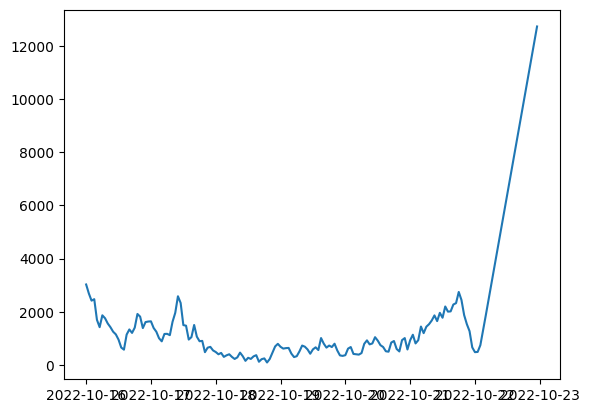

In [12]:
plt.plot(pv_df["Date"], pv_df["Wind_Production"])
plt.show()

### Plot PV Production

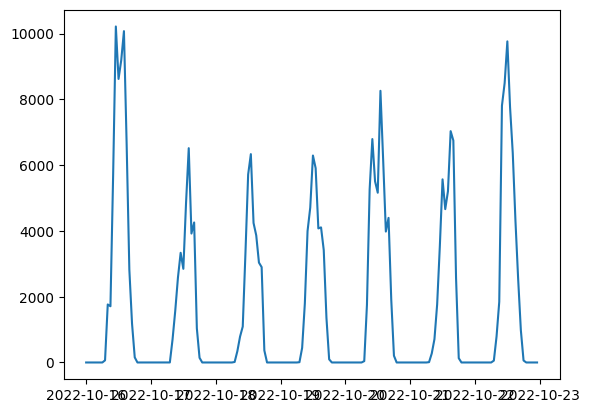

In [13]:
plt.plot(pv_df["Date"], pv_df["PV_Production"])
plt.show()

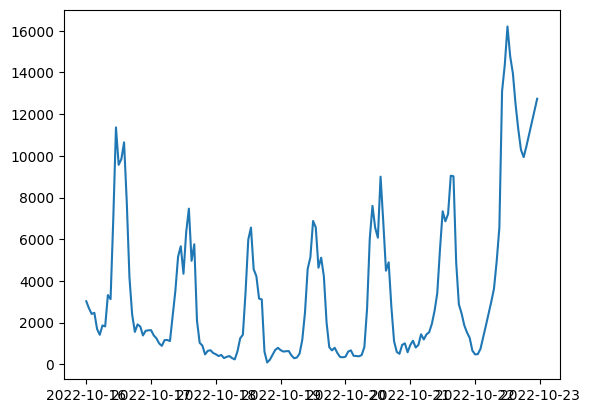

In [14]:
plt.plot(pv_df["Date"], pv_df["Production"])
plt.show()

### Change Consumption data in order to be used in the optimization model

In [15]:
cg = ConsumptionGenerator("../data.json", path_steps_seconds, path_steps_minutes)
community_size = len(cg.get_community())
num_generators = 2
num_storages = 1

data['data']['parameterData']['resources']['numGen'] = num_generators
data['data']['parameterData']['resources']['numLoad'] = community_size
data['data']['parameterData']['resources']['numStor'] = num_storages

data['data']['load']['limit'] = data['data']['load']['limit'][:community_size]
data['data']['load']['info'] = data['data']['load']['info'][:community_size]

data['data']['generator']['limit'] = data['data']['generator']['limit'][:num_generators]
data['data']['generator']['info'] = data['data']['generator']['info'][:num_generators]

data['data']['storage']['limit'] = data['data']['storage']['limit'][:num_storages]
data['data']['storage']['info'] = data['data']['storage']['info'][:num_storages]

for x in os.walk(path_steps_minutes):
    if x[0] is not path_steps_minutes:
        print(x[0])
        house_total_df = pd.read_csv(x[0] + '/total.csv', sep=';')
        house_total_df.columns = ['Date', 'Demand']
        house_total_df['Date'] = pd.to_datetime(house_total_df['Date'])
        house_total_df.set_index('Date')
        
        house_total_df = house_total_df.resample('1H', on='Date').mean()
                
        pos = int(x[0].split("house")[1])
        for y in range(len(data['data']['load']['limit'][pos])):
            data['data']['load']['limit'][pos][y][0] = house_total_df.iloc[y]["Demand"]/1000
            data['data']['load']['limit'][pos][y][1] = 0
            data['data']['load']['limit'][pos][y][2] = house_total_df.iloc[y]["Demand"]/1000*0.01
            data['data']['load']['limit'][pos][y][3] = house_total_df.iloc[y]["Demand"]/1000*0.01
            print(house_total_df.iloc[y]["Demand"])

../output/minute\house0
134.91030555555554
166.82061111111113
134.91030555555554
134.91030555555554
1437.4723888888889
273.7342777777778
491.68436111111106
269.30805555555554
256.9876388888889
360.68119444444443
187.7094722222222
151.14591666666666
189.73433333333332
208.4272222222222
188.1642222222222
187.6708888888889
184.2543611111111
360.26624999999996
134.91030555555554
301.452
769.2373333333333
129.21602777777778
141.21127777777778
188.59469444444446
134.91030555555554
134.91030555555554
134.91030555555554
134.91030555555557
134.91030555555554
134.91030555555557
124.47438888888888
145.34622222222222
362.6970277777778
160.5810555555555
360.2662222222222
1483.0824166666666
286.76858333333337
565.9020277777778
253.31708333333333
360.26624999999996
167.95583333333335
189.98799999999997
173.52599999999998
886.7092777777777
157.21525
150.8039722222222
159.4611111111111
162.15477777777778
1471.8556944444442
558.7251388888889
212.91275
190.86027777777778
134.91030555555554
134.9103055555

../output/minute\house4
269.22366666666665
238.11183333333332
269.1123888888889
238.2231111111111
236.42999999999998
1534.381111111111
353.3986388888889
712.2378055555556
786.0174166666667
286.9688888888889
448.1857777777778
2095.461138888889
652.2213888888889
287.3773333333333
307.3861111111111
329.57869444444447
276.14716666666664
269.70425
332.85875
1354.4998333333335
294.51861111111106
273.72038888888886
279.1316111111111
261.21122222222226
269.22366666666665
226.47322222222223
249.75044444444444
238.11183333333335
238.11183333333332
269.22366666666665
238.11183333333332
636.6821111111111
1750.5141388888887
577.6809444444444
478.0444444444444
571.1133333333333
771.2080555555555
2015.5848611111112
305.71794444444447
273.38180555555556
269.24547222222225
306.2886111111111
319.52194444444444
1431.0730555555556
279.4424722222222
266.8903888888889
260.7478888888889
260.41669444444443
238.11183333333332
269.22366666666665
238.11183333333335
269.22366666666665
211.68936111111114
233.42247

### Change generator type to 2 (Renewables) in the second generator

In [16]:
data['data']['generator']['info'][1][1] = 2

### Change battery info

In [17]:
# Change Energy Capacity to 10 kVAh
data['data']['storage']['info'][0][5] = 10

# Change P Charge Max to 3 kW
data['data']['storage']['info'][0][10] = 3

# Change P Discharge Max to 3 kW 
data['data']['storage']['info'][0][11] = 3

# Change Initial State to 0%
data['data']['storage']['info'][0][9] = 0

### Change pImp and pExp to near 0

In [18]:
data['data']['parameterData']['generalInfo']['P_Max_Imp'][:] = 1
data['data']['parameterData']['generalInfo']['P_Max_Exp'][:] = 1

### Change Production (Wind and PV) data in order to be used in the optimization model

In [19]:
#Add Production (Generator with type = 2 - Renewables)
for x in range(len(data['data']['generator']['limit'])):
    for y in range(len(data['data']['generator']['limit'][x])):
        if (x == 0): #PV
            data['data']['generator']['limit'][x][y][0] = pv_df.iloc[y]["PV_Production"]/1000
        else: #Wind
            data['data']['generator']['limit'][x][y][0] = pv_df.iloc[y]["Wind_Production"]/1000


### Linearize the generator prices

In [20]:
genCofA = data['data']['generator']['limit'][:, :, 5]
genCofB = data['data']['generator']['limit'][:, :, 6]
genCofC = data['data']['generator']['limit'][:, :, 7]

### Options for simulation

In [21]:
iterlim = 1000000000
reslim = 5000000000

### Define the number of the used resources (generators, houses, periods, etc)

In [22]:
numGen = np.arange(1, data['data']['parameterData']['resources']['numGen'] + 1)
numLoad = np.arange(1, data['data']['parameterData']['resources']['numLoad'] + 1)
numStor = np.arange(1, data['data']['parameterData']['resources']['numStor'] + 1)
numPeriod = np.arange(1, data['data']['parameterData']['resources']['period'] + 1)
#numPeriod = np.array([i%24+1 for i in range(0,168)])
numBus = np.arange(1) # forced to 1
nOwner = np.arange(1, data['data']['parameterData']['resources']['owners'] + 1)

In [23]:
numPeriod

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168])

### Define the strings with the resources in order to be used by GAMS

In [24]:
gen = np.max(numGen)
Load = np.max(numLoad)
stor = np.max(numStor)
period = np.max(numPeriod)
Bus = np.max(numBus)

### Define the matrixes with the data in order to be used by GAMS

In [25]:
# General Info
pMaxImp = data['data']['parameterData']['generalInfo']['P_Max_Imp']
pMaxExp = data['data']['parameterData']['generalInfo']['P_Max_Exp']
buyPrice = data['data']['parameterData']['generalInfo']['Energy_Buy_Price']
sellPrice = data['data']['parameterData']['generalInfo']['Energy_Sell_Price']

# Generators
genLimit = data['data']['generator']['limit'][numGen[0]-1:numGen[-1]+1, numPeriod[0]-1:numPeriod[-1]+1, :]
#genLimit = data['data']['generator']['limit'][numGen[0]-1:numGen[-1]+1, numPeriod[0]-1:numPeriod[-1]*num_days, :]
genInfo = data['data']['generator']['info']

# Loads
loadLimit = data['data']['load']['limit'][numLoad[0]-1:numLoad[-1]+1, numPeriod[0]-1:numPeriod[-1]+1, :]
#loadLimit = data['data']['load']['limit'][numLoad[0]-1:numLoad[-1]+1, numPeriod[0]-1:numPeriod[-1]*num_days, :]

# Storages
storLimit = data['data']['storage']['limit'][numStor[0]-1:numStor[-1]+1, numPeriod[0]-1:numPeriod[-1]+1, :]
#storLimit = data['data']['storage']['limit'][numStor[0]-1:numStor[-1]+1, numPeriod[0]-1:numPeriod[-1]*num_days, :]
storInfo = data['data']['storage']['info']

### Define the network data for the GAMS

In [26]:
# Branchs
branchData = data['data']['network']['branch']

# Maximum Voltage
voltageMax = data['data']['parameterData']['network']['voltageMax']

# Minimum Voltage
voltageMin = data['data']['parameterData']['network']['voltageMin']

# Maximum Angle
angleMax = data['data']['parameterData']['network']['angleMax']

# Minimum Angle
angleMin = data['data']['parameterData']['network']['angleMin']

# Defines the matrix of admitances
ybus = data['data']['parameterData']['network']['ybus']
diag = data['data']['parameterData']['network']['diag']
branchID = data['data']['parameterData']['network']['branch']

### Change MaxImp and MaxExp to support 1 week instead of just 1 day

In [27]:
arrImp = []
arrExp = []

for i in range(num_days):
    arrImp = np.append(arrImp, pMaxImp)
    arrExp = np.append(arrExp, pMaxExp)
    
pMaxImp = arrImp
pMaxExp = arrExp

### Change BuyPrice and SellPrice to support 1 week instead of just 1 day

In [28]:
arrBuy = []
arrSell = []

for i in range(num_days):
    arrBuy = np.append(arrBuy, buyPrice)
    arrSell = np.append(arrSell, sellPrice)
    
buyPrice = arrBuy
sellPrice = arrSell

### Reset the DG fixed and quadratic cost

In [29]:
genLimit.shape

(2, 168, 8)

In [30]:
genLimit[:, :, 3] = 0
genLimit[:, :, 5] = 0

genLimit = np.append(genLimit, np.zeros(shape=(num_generators, 24*num_days, 4)), axis=2)

### Define the fixed sets structure to use in the parameters of the gams optimization process

In [31]:
NCOLS = 12

genLimitInfo = np.arange(1, NCOLS+1)
loadLimitInfo = np.arange(1, NCOLS+1)
storLimitInfo = np.arange(1, NCOLS+1)

### Define the several sets structure used in the gams optimization process

In [32]:
# these sets depends the number of resources used in matlab code

_t = np.arange(1, period+1)
_gen = np.arange(1, gen+1)
_Load = np.arange(1, Load+1)
_stor = np.arange(1, stor+1)

### Aux function to convert numpy into dictionaries

In [33]:
def _auxDictionary(a):
    temp_dictionary = {}
    
    if len(a.shape) == 3:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                for dim2 in np.arange(a.shape[2]):
                    temp_dictionary[(dim0+1, dim1+1, dim2+1)] = a[dim0, dim1, dim2]
    elif len(a.shape) == 2:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                temp_dictionary[(dim0+1, dim1+1)] = a[dim0, dim1]
                
    else:
        for dim0 in np.arange(a.shape[0]):
            temp_dictionary[(dim0+1)] = a[dim0]
                
    return temp_dictionary

#temp_dict1 = _auxDictionary(loadLimit)

### Pyomo Imports

In [34]:
import pyomo
import pyomo.opt
import pyomo.environ as pe

### Create the model

In [35]:
model = pe.ConcreteModel()

model.genLimitInfo = pe.Set(initialize=genLimitInfo, 
                            doc='Indicate the number of columns of information from generators')
model.loadLimitInfo = pe.Set(initialize=loadLimitInfo, 
                             doc='Indicate the number of columns of information from loads')
model.storLimitInfo = pe.Set(initialize=storLimitInfo, 
                             doc='Indicate the number of columns of information from storage units')

# Sets
model.t = pe.Set(initialize=_t, doc='period')
model.gen = pe.Set(initialize=_gen, doc='generators')
model.loads = pe.Set(initialize=_Load, doc='loads')
model.stor = pe.Set(initialize=_stor, doc='storage')

### Define the parameters with the data from the excel, such as limits, price, and voltage

In [36]:
model.loadLimit = pe.Param(model.loads, model.t, model.loadLimitInfo, 
                           initialize=_auxDictionary(loadLimit))

model.genLimit = pe.Param(model.gen, model.t, model.genLimitInfo,
                          initialize=_auxDictionary(genLimit))

model.genInfo = pe.Param(model.gen, model.genLimitInfo,
                         initialize=_auxDictionary(genInfo))

model.pMaxImp = pe.Param(model.t,
                         initialize=_auxDictionary(pMaxImp))

model.buyPrice = pe.Param(model.t,
                          initialize=_auxDictionary(buyPrice))

model.pMaxExp = pe.Param(model.t,
                         initialize=_auxDictionary(pMaxExp))

model.sellPrice = pe.Param(model.t,
                           initialize=_auxDictionary(sellPrice))

model.storLimit = pe.Param(model.stor, model.t, model.storLimitInfo,
                           initialize=_auxDictionary(storLimit))

model.storInfo = pe.Param(model.stor, model.storLimitInfo,
                          initialize=_auxDictionary(storInfo[:, :12]))

model.loadActPower = pe.Param(model.loads, model.t,
                              initialize=_auxDictionary(loadLimit[:, :, 0]))
model.optCost = pe.Var()#initialize=0)

### Define the variables for the gams optimization process

In [37]:
model.derCost = pe.Var(domain=pe.Reals, initialize=0)

In [38]:
# Positive variables
model.genActPower = pe.Var(model.gen, model.t, domain=pe.PositiveReals, initialize=1)
model.genExcActPower = pe.Var(model.gen, model.t, domain=pe.PositiveReals, initialize=1)
model.pImp = pe.Var(model.t, domain=pe.PositiveReals, initialize=1)
model.pExp = pe.Var(model.t, domain=pe.PositiveReals, initialize=1)

In [39]:
# Load params
model.loadRedActPower = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)
model.loadCutActPower = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)
model.loadENS = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)

# Storage params
model.storEnerState = pe.Var(model.stor, model.t, domain=pe.PositiveReals, initialize=1)
model.storDchActPower = pe.Var(model.stor, model.t, domain=pe.PositiveReals, initialize=1)
model.storChActPower = pe.Var(model.stor, model.t, domain=pe.PositiveReals, initialize=1)
model.EminRelaxStor = pe.Var(model.stor, model.t, domain=pe.PositiveReals, initialize=1)

In [40]:
# Binary variables
model.genXo = pe.Var(model.gen, model.t, domain=pe.Binary, initialize=0)
model.loadXo = pe.Var(model.loads, model.t, domain=pe.Binary, initialize=0)

model.storChXo = pe.Var(model.stor, model.t, domain=pe.Binary, initialize=0)
model.storDchXo = pe.Var(model.stor, model.t, domain=pe.Binary, initialize=0)

In [41]:
# Default behaviour
default_behaviour = pe.Constraint.Skip

### Define the Model Constraints

In [42]:
# Network constraints

def _maxImpEq(m, t):
    return m.pImp[t] <= m.pMaxImp[t] 

model.MaxImpEq = pe.Constraint(model.t, rule=_maxImpEq)

def _maxExpEq(m, t):
    return m.pExp[t] <= m.pMaxExp[t]

model.MaxExpEq = pe.Constraint(model.t, rule=_maxExpEq)

In [43]:
# Generator constraints with the active generation power

# Maximum generation in generators with normal contract
def _genActMaxEq1(m, g, t):
    if m.genInfo[g, 5] == 1:
        return (m.genActPower[g, t] <= m.genLimit[g, t, 1])
    return default_behaviour
    
model.genActMaxEq1 = pe.Constraint(model.gen, model.t, rule=_genActMaxEq1)

#*Minimum generation in generators with normal contract
def _genActMinEq(m, g, t):
    if m.genInfo[g, 5] == 1:
        return (m.genActPower[g, t] >= m.genInfo[g, 7] * m.genXo[g, t])
    return default_behaviour
    
model.genActMinEq = pe.Constraint(model.gen, model.t, rule=_genActMinEq)

#*Generation in generators with Feed-in tariffs
def _genActMaxEq2(m, g, t):
    if m.genInfo[g, 5] == 2:
        return (m.genActPower[g ,t] + m.genExcActPower[g, t] == m.genLimit[g, t, 1])
    return default_behaviour
    
model.genActMaxEq2 = pe.Constraint(model.gen, model.t, rule=_genActMaxEq2)

In [44]:
# Load constraints

def _loadReactEq(m, l, t):
    return m.loadRedActPower[l, t] <= m.loadLimit[l, t, 3]

model.loadReactEq = pe.Constraint(model.loads, model.t, rule=_loadReactEq)


def _loadCutActPowerEq(m, l, t):
    return m.loadCutActPower[l, t] == m.loadLimit[l, t, 4] * m.loadXo[l, t]

model.loadCutActPowerEq = pe.Constraint(model.loads, model.t, rule=_loadCutActPowerEq)


def _loadENSEq(m, l, t):
    return m.loadENS[l, t] + m.loadRedActPower[l, t] + m.loadCutActPower[l, t] <= m.loadActPower[l, t]

model.loadENSEq = pe.Constraint(model.loads, model.t, rule=_loadENSEq)

In [45]:
# Storage constraints

def _storDchRateIneq(m, s, t):
    return m.storDchActPower[s, t] <= m.storLimit[s, t, 2] * m.storDchXo[s, t]
model.storDchRateIneq = pe.Constraint(model.stor, model.t, rule=_storDchRateIneq)


def _storChRateIneq(m, s, t):
    return m.storChActPower[s, t] <= m.storLimit[s, t, 1] * m.storChXo[s, t]
model.storChRateIneq = pe.Constraint(model.stor, model.t, rule=_storChRateIneq)


def _storMaxEq(m, s, t):
    return m.storEnerState[s, t] <= m.storInfo[s, 6]
model.storMaxEq = pe.Constraint(model.stor, model.t, rule=_storMaxEq)


def _storRelaxEq(m, s, t):
    return m.storEnerState[s, t] >= m.storInfo[s, 7] * (m.storInfo[s, 6]/100) - m.EminRelaxStor[s, t]
model.storRelaxEq = pe.Constraint(model.stor, model.t, rule=_storRelaxEq)


def _storBatBalanceEq(m, s, t):
    if t == 1:
        return m.storEnerState[s, t] == m.storInfo[s, 6] * (m.storInfo[s, 10]/100) + m.storChActPower[s, t] * (m.storInfo[s, 8]/100) - m.storDchActPower[s, t]/(m.storInfo[s, 9] / 100)
    elif t > 1:
        return m.storEnerState[s, t] == m.storEnerState[s, t-1] + m.storChActPower[s, t] * (m.storInfo[s, 8]/100) - m.storDchActPower[s, t]/(m.storInfo[s, 9]/100)
    return default_behaviour
model.storBatBalance = pe.Constraint(model.stor, model.t, rule=_storBatBalanceEq)


def _storBin(m, s, t):
    return m.storChXo[s, t] + m.storDchXo[s, t] <= 1
model.storBin = pe.Constraint(model.stor, model.t, rule=_storBin)

In [46]:
# Energy Balance

def _actBalanceEqSimple(m, t):
    temp_sum1 = sum([m.genActPower[i, t] - m.genExcActPower[i, t] for i in np.arange(1, m.gen.last()+1)])
    temp_sum2 = sum(m.loadActPower[:, t])
    
    return temp_sum1 + m.pImp[t] - m.pExp[t] - temp_sum2 == 0

#model.actBalanceSimple = pe.Constraint(model.t, rule=_actBalanceEqSimple)


def _actBalanceEq(m, t):
    temp_gens = sum([m.genActPower[g, t] - m.genExcActPower[g, t] for g in np.arange(1, m.gen.last()+1)])
    
    temp_loads = sum([m.loadActPower[l, t] - m.loadRedActPower[l, t] - m.loadCutActPower[l, t] - m.loadENS[l, t]
                      for l in np.arange(1, m.loads.last() + 1)])
    
    temp_stor = sum([m.storChActPower[s, t] - m.storDchActPower[s, t]
                     for s in np.arange(1, m.stor.last() + 1)])
    
    return temp_gens + m.pImp[t] - m.pExp[t] - temp_stor - temp_loads == 0
model.actBalanceSimple = pe.Constraint(model.t, rule=_actBalanceEq)

### Define the Objective Function

In [47]:
def _objFun(m):
    temp_gens = sum([m.genActPower[g, t] * m.genLimit[g, t, 3] + m.genExcActPower[g, t] * m.genLimit[g, t, 5]
                     for t in np.arange(1, m.t.last() + 1) for g in np.arange(1, m.gen.last()+1)])
    
    temp_loads = sum([m.loadRedActPower[l, t] * m.loadLimit[l, t, 7] + m.loadCutActPower[l, t] * m.loadLimit[l, t, 8] + m.loadENS[l, t] * m.loadLimit[l, t, 10] 
                      for t in np.arange(1, m.t.last() + 1) for l in np.arange(1, m.loads.last() + 1)])
    
    temp_stor = sum([m.storDchActPower[s, t] * m.storLimit[s, t, 4] - m.storChActPower[s, t] * m.storLimit[s, t, 3] + m.EminRelaxStor[s, t] * 200 
                     for t in np.arange(1, m.t.last() +1) for s in np.arange(1, m.stor.last() + 1)])
    
    temp_rest = sum([m.pImp[t] * m.buyPrice[t] - m.pExp[t] * m.sellPrice[t] for t in np.arange(1, m.t.last() + 1)])

    m.derCost = temp_gens + temp_loads + temp_stor + temp_rest

    return temp_gens + temp_loads + temp_stor + temp_rest
    
model.ObjFun = pe.Objective(rule=_objFun, sense=pe.minimize)

### Solve the model using Ipopt or Cplex

In [48]:
import cplex
from pyomo.opt import SolverFactory

model.write('res_V4_EC.lp',  io_options={'symbolic_solver_labels': True})

# Create a solver
#opt = pe.SolverFactory('cplex', executable='C:/Program Files/IBM/ILOG/CPLEX_Studio_Community221/cplex/bin/x64_win64/cplex.exe')
opt = pe.SolverFactory('ipopt', executable='C:/Program Files/Ipopt-3.11.1-win64-intel13.1/bin/ipopt.exe')
#opt.options['LogFile'] = 'res_V4_EC.log'
opt.options['print_level'] = 12
opt.options['output_file'] = "res_V5_EC.log"

results = opt.solve(model)#, tee=True)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 4536
  Number of variables: 5376
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 71.81895303726196
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


### Extract Pyomo values

In [49]:
# Extract Pyomo values
# https://stackoverflow.com/questions/67491499/how-to-extract-indexed-variable-information-in-pyomo-model-and-build-pandas-data

def ext_pyomo_vals(vals):
    # make a pd.Series from each 
    s = pd.Series(vals.extract_values(),
                  index=vals.extract_values().keys())
    
    # if the series is multi-indexed we need to unstack it...
    if type(s.index[0]) == tuple:    # it is multi-indexed
        s = s.unstack(level=1)
    else:
        # force transition from Series -> df
        s = pd.DataFrame(s)
        
    return s

### Extract the results

In [50]:
# Generation
result_genActPower = ext_pyomo_vals(model.genActPower)
result_genExcActPower = ext_pyomo_vals(model.genExcActPower)

# Imports/Exports
result_pimp = ext_pyomo_vals(model.pImp)
result_pexp = ext_pyomo_vals(model.pExp)

# Loads
result_loadRedActPower = ext_pyomo_vals(model.loadRedActPower)
result_loadCutActPower = ext_pyomo_vals(model.loadCutActPower)
result_loadENS = ext_pyomo_vals(model.loadENS)

# Storage
result_storDchActPower = ext_pyomo_vals(model.storDchActPower)
result_storChActPower = ext_pyomo_vals(model.storChActPower)
result_storEnerState = ext_pyomo_vals(model.storEnerState)

# Booleans
result_genXo = ext_pyomo_vals(model.genXo)
result_loadXo = ext_pyomo_vals(model.loadXo)
result_storDchXo = ext_pyomo_vals(model.storDchXo)
result_storChXo = ext_pyomo_vals(model.storChXo)

### Convert the results to pandas csv and save the results

In [51]:
# Gens
pd_genActPower = pd.DataFrame(result_genActPower)
pd_genActPower.to_csv('../results/cplex_pyomo/genActPower.csv', index=None)

pd_genExcActPower = pd.DataFrame(result_genExcActPower)
pd_genExcActPower.to_csv('../results/cplex_pyomo/genExcActPower.csv', index=None)

# Import/Export
pd_pimp = pd.DataFrame(result_pimp)
pd_pimp.to_csv('../results/cplex_pyomo/pimp.csv', index=None)

pd_pexp = pd.DataFrame(result_pexp)
pd_pexp.to_csv('../results/cplex_pyomo/pexp.csv', index=None)

# Loads
pd_loadRedActPower = pd.DataFrame(result_loadRedActPower)
pd_loadRedActPower.to_csv('../results/cplex_pyomo/loadRedActPower.csv', index=None)

pd_loadCutActPower = pd.DataFrame(result_loadCutActPower)
pd_loadCutActPower.to_csv('../results/cplex_pyomo/loadCutActPower.csv', index=None)

pd_loadENS = pd.DataFrame(result_loadENS)
pd_loadENS.to_csv('../results/cplex_pyomo/loadENS.csv', index=None)


# Storage
pd_storDchActPower = pd.DataFrame(result_storDchActPower)
pd_storDchActPower.to_csv('../results/cplex_pyomo/storDchActPower.csv', index=None)

pd_storChActPower = pd.DataFrame(result_storChActPower)
pd_storChActPower.to_csv('../results/cplex_pyomo/storChActPower.csv', index=None)

pd_storEnerState = pd.DataFrame(result_storEnerState)
pd_storEnerState.to_csv('../results/cplex_pyomo/storEnerState.csv', index=None)


# Booleans
pd_genXo = pd.DataFrame(result_genXo)
pd_genXo.to_csv('../results/cplex_pyomo/genXo.csv', index=None)

pd_loadXo = pd.DataFrame(result_loadXo)
pd_loadXo.to_csv('../results/cplex_pyomo/loadXo.csv', index=None)

pd_storDchXo = pd.DataFrame(result_storDchXo)
pd_storDchXo.to_csv('../results/cplex_pyomo/storDchXo.csv', index=None)

pd_storChXo = pd.DataFrame(result_storChXo)
pd_storChXo.to_csv('../results/cplex_pyomo/storChXo.csv', index=None)

### Plot the results of the optimization model

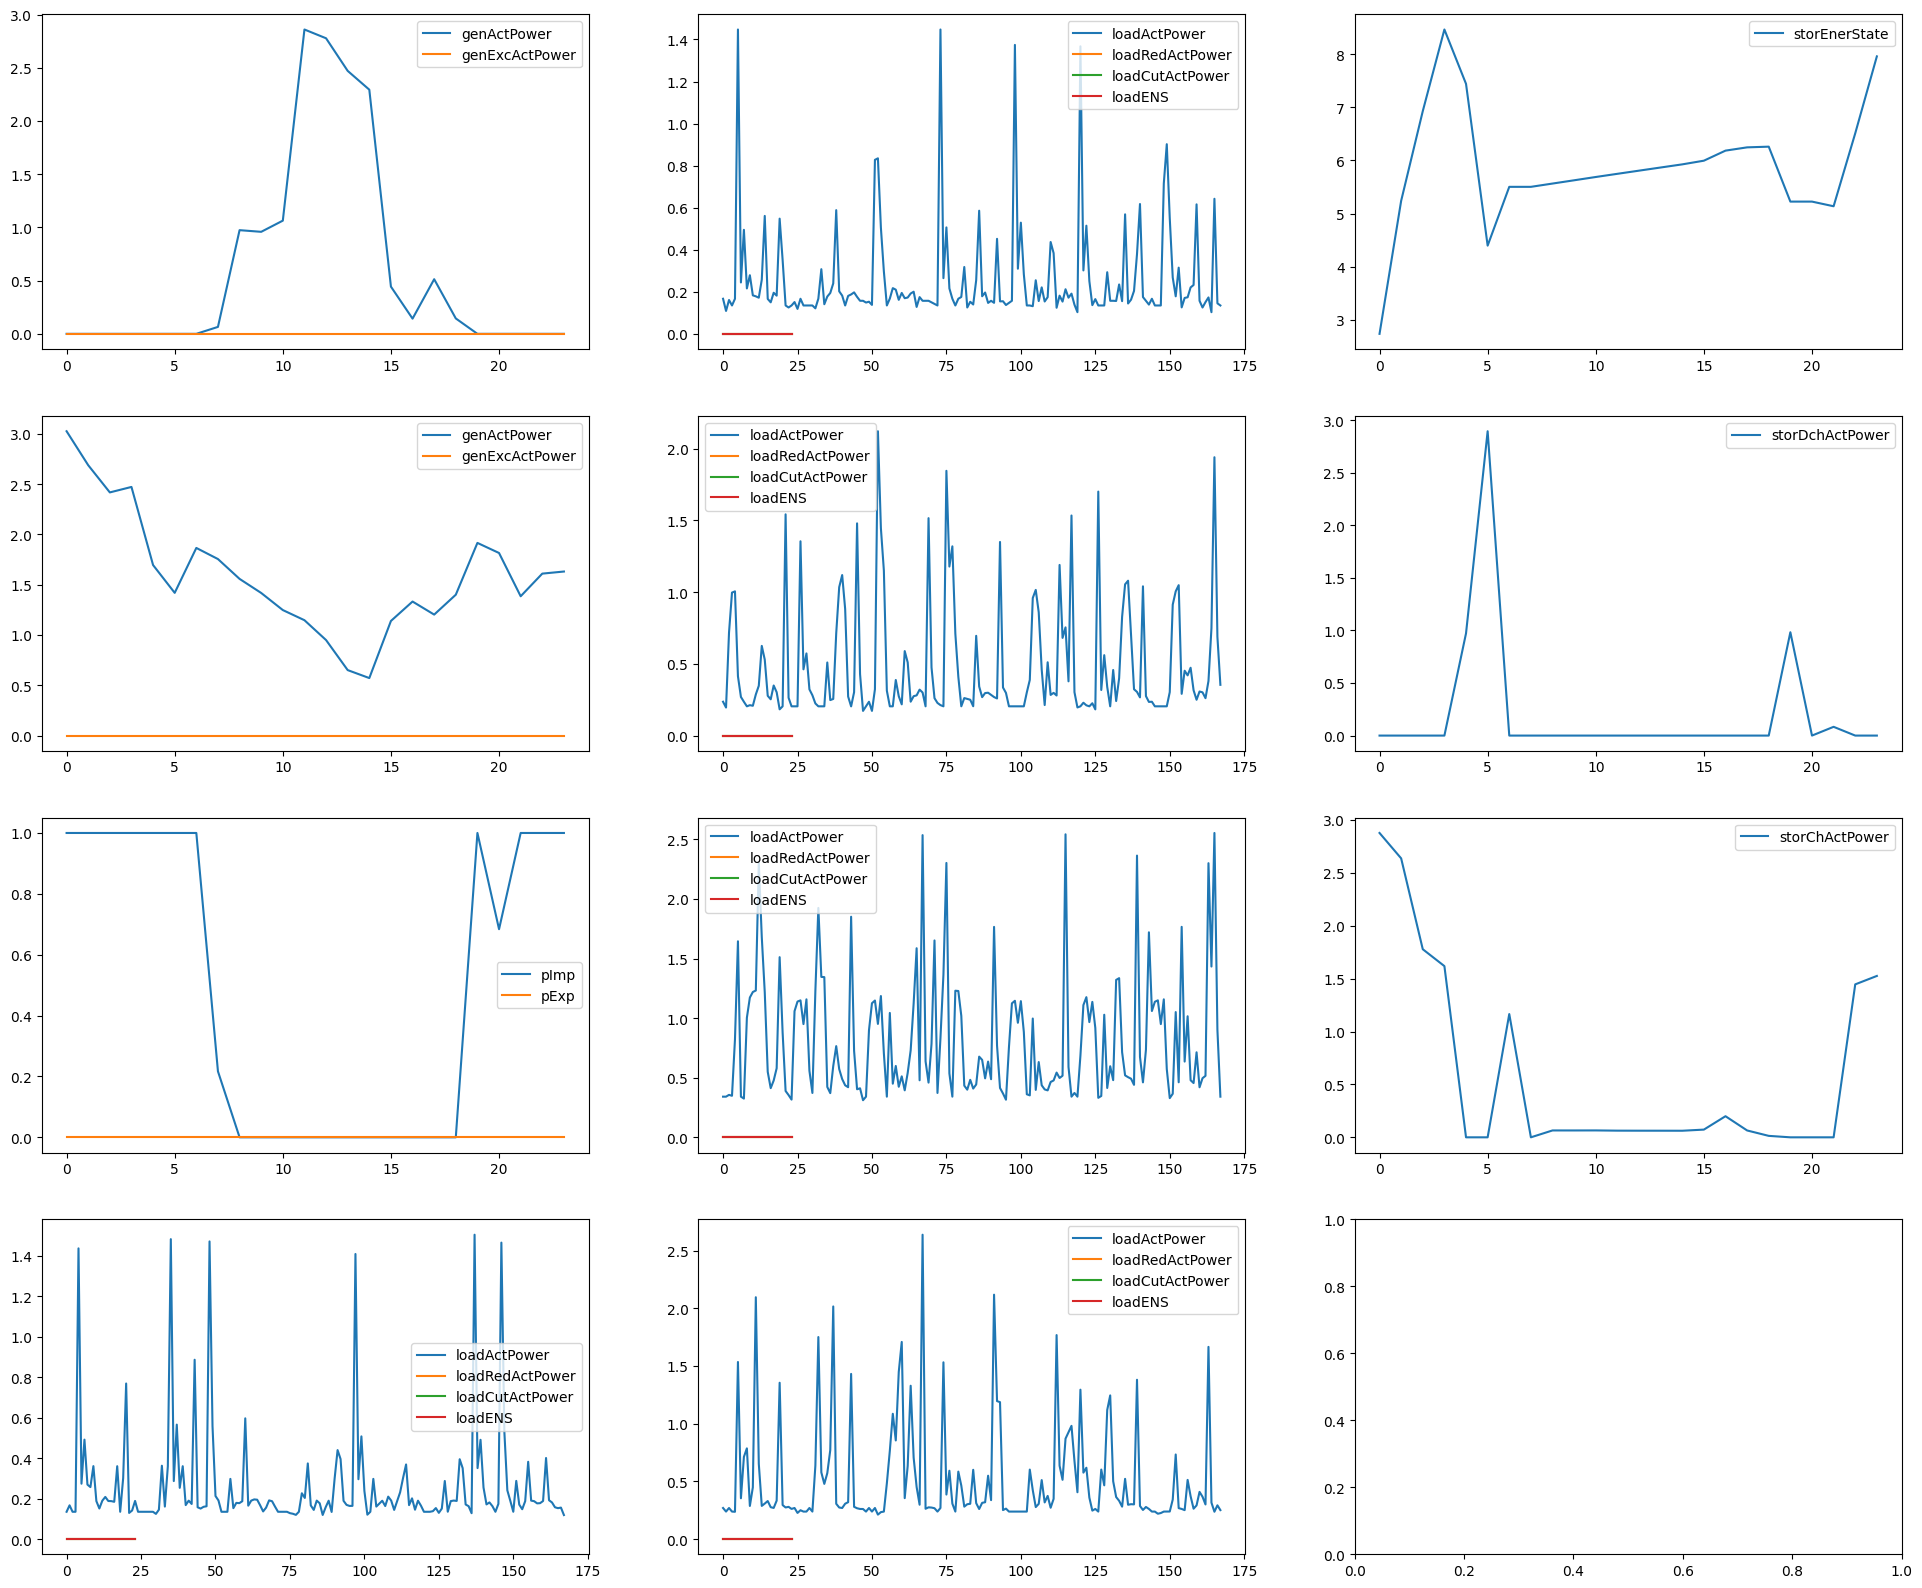

In [52]:
# Plot results

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(24, 20))

for i in np.arange(num_generators):
    # Generators
    axs[i, 0].plot(result_genActPower.values[i][:24])
    axs[i, 0].plot(result_genExcActPower.values[i][:24])
    axs[i, 0].legend(['genActPower', 'genExcActPower'])
    
for i in np.arange(5):
    # Loads
    if (i == 0):
        x = num_generators+1
        y = 0
    else:
        x = i-1
        y = 1
    axs[x, y].plot(loadLimit[:, :, 0][i, :])
    axs[x, y].plot(result_loadRedActPower.values[i][:24])
    axs[x, y].plot(result_loadCutActPower.values[i][:24])
    axs[x, y].plot(result_loadENS.values[i][:24])
    axs[x, y].legend(['loadActPower', 'loadRedActPower', 'loadCutActPower', 'loadENS'])


#axs[0, 2].plot(result_pimp.values)
#axs[0, 2].plot(result_pexp.values)
#axs[0, 2].legend(['pImp', 'pExp'])
axs[2, 0].plot(result_pimp.values[:24])
axs[2, 0].plot(result_pexp.values[:24])
axs[2, 0].legend(['pImp', 'pExp'])


#for i in range(1):
    #axs[i, 3].plot(result_storEnerState.values[i])
    #axs[i, 3].legend(['storEnerState'])
axs[0, 2].plot(result_storEnerState.values[0][:24])
axs[0, 2].legend(['storEnerState'])
    
#for i in range(1):
    #axs[i, 4].plot(result_storDchActPower.values[i])
    #axs[i, 4].legend(['storDchActPower'])
axs[1, 2].plot(result_storDchActPower.values[0][:24])
axs[1, 2].legend(['storDchActPower'])
    
#for i in range(1):
    #axs[i, 5].plot(result_storChActPower.values[i])
    #axs[i, 5].legend(['storChActPower'])
axs[2, 2].plot(result_storChActPower.values[0][:24])
axs[2, 2].legend(['storChActPower'])


plt.show()

### Calculate total cost

In [53]:
print('Total import cost: {}'.format(sum(result_pimp.values.ravel() * buyPrice)))

Total import cost: 6.418770876829748


In [54]:
# Used from PV
df = pd.read_csv('../results/cplex_pyomo/genActPower.csv', sep=',')
epv = df.mean(axis = 1).sum()*24
print(epv)

50.83097832599837


In [55]:
# Used from grid (imported)
df = pd.read_csv('../results/cplex_pyomo/pimp.csv', sep=',')
eg = df.mean(axis = 0).sum()*24
print(eg)

12.510638206427245


In [56]:
# Not used from PV (exported)
df = pd.read_csv('../results/cplex_pyomo/pexp.csv', sep=',')
ewpv = df.mean(axis = 0).sum()*24
print(ewpv)

2.6173934275733868


In [57]:
# Total Production
print(pv_df.mean(axis = 0)['Production']/1000*24)

84.55465784905378


C:\Users\Nuno.Velosa.CORP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [58]:
# Not used from PV
print(abs(pv_df.loc[pv_df.Netload <= 0, 'Netload'].mean()) / 1000*24)

98.20864061197973


In [59]:
# Used from PV
print((abs(pv_df.loc[pv_df.Netload <= 0, 'Demand'].mean()/2) + abs(pv_df.loc[pv_df.Netload > 0, 'Production'].mean()/2)) / 1000*24)

36.97796179137127


In [60]:
# Used from grid
print(pv_df.loc[pv_df.Netload > 0, 'Netload'].mean() / 1000*24)

38.109476556353314


### Create Area Chart graphs

In [61]:
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Nuno.Velosa.CORP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Production (1 week)

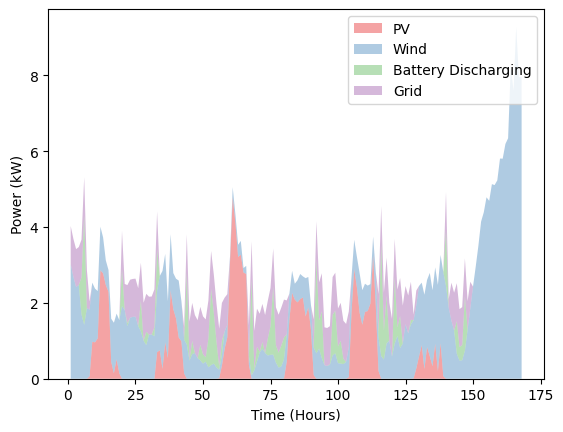

In [62]:
import seaborn as sns

act_power = pd.read_csv('../results/cplex_pyomo/genActPower.csv', sep=',')
stor_dch_power = pd.read_csv('../results/cplex_pyomo/storDchActPower.csv', sep=',')
pimp = pd.read_csv('../results/cplex_pyomo/pimp.csv', sep=',')

# Your x and y axis
x = range(1,24*7+1)
y = [ act_power.loc[0], act_power.loc[1], stor_dch_power.iloc[0], pimp["0"] ]
 
# use a known color palette
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['PV','Wind','Battery Discharging', 'Grid'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()
 

#### Demand / Consumption (1 week)

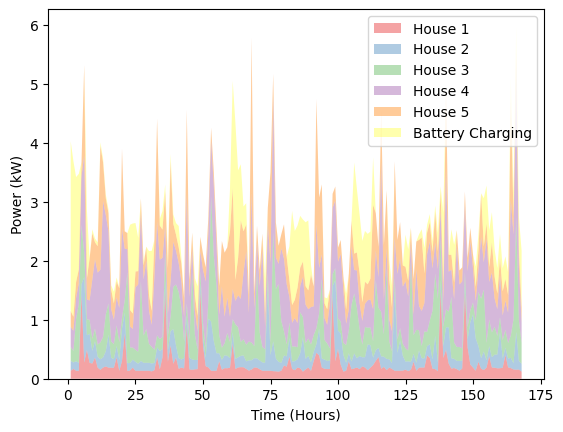

In [63]:
load_power = pd.read_csv('../results/cplex_pyomo/loadXo.csv', sep=',')
stor_ch_power = pd.read_csv('../results/cplex_pyomo/storChActPower.csv', sep=',')

#print(pimp["0"])
#print(loadLimit[:, :, 0][4, :].shape)

x = range(1,24*7+1)
y = [loadLimit[:, :, 0][0, :], loadLimit[:, :, 0][1, :], loadLimit[:, :, 0][2, :], loadLimit[:, :, 0][3, :], loadLimit[:, :, 0][4, :], stor_ch_power.iloc[0]]
 
# use a known color palette
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['House 1','House 2','House 3', 'House 4', 'House 5', 'Battery Charging'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Demand / Consumption (1 day)

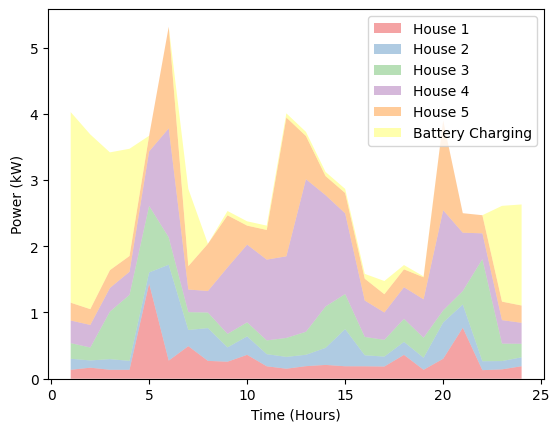

In [64]:
x = range(1,24+1)
y = [loadLimit[:, :, 0][0, :][:24], loadLimit[:, :, 0][1, :][:24], loadLimit[:, :, 0][2, :][:24], loadLimit[:, :, 0][3, :][:24], loadLimit[:, :, 0][4, :][:24], stor_ch_power.iloc[0][:24]]
 
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['House 1','House 2','House 3', 'House 4', 'House 5', 'Battery Charging'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Production (1 day)

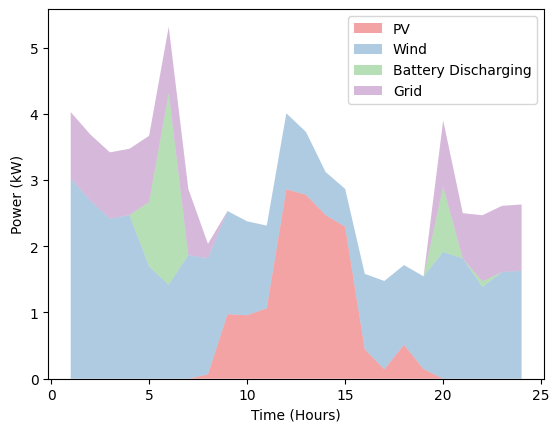

In [65]:
x = range(1,24+1)
y = [ act_power.loc[0][:24], act_power.loc[1][:24], stor_dch_power.iloc[0][:24], pimp["0"][:24] ]
 
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['PV','Wind','Battery Discharging', 'Grid'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1 week)

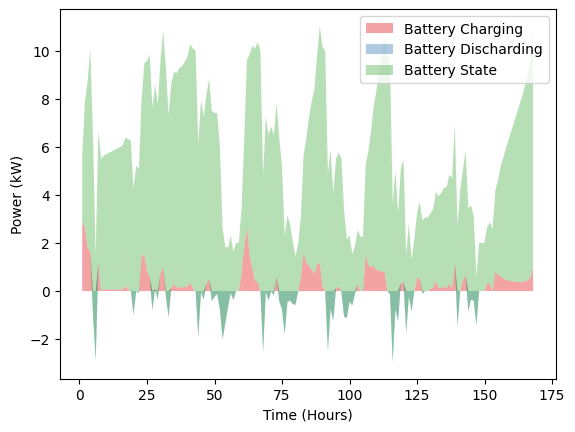

In [66]:
stor_ener_state = pd.read_csv('../results/cplex_pyomo/storEnerState.csv', sep=',')

stor_dch_power[:] = stor_dch_power[:]*(-1)

x = range(1,24*7+1)
y = [stor_ch_power.iloc[0], stor_dch_power.iloc[0], stor_ener_state.iloc[0]]
 
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding', 'Battery State'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1 week) - Normal plot

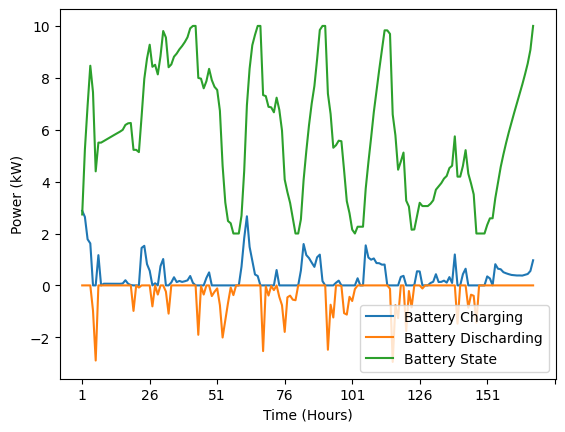

In [67]:
stor_ch_power.iloc[0].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

##### Battery events and state (1 day) - Normal plot

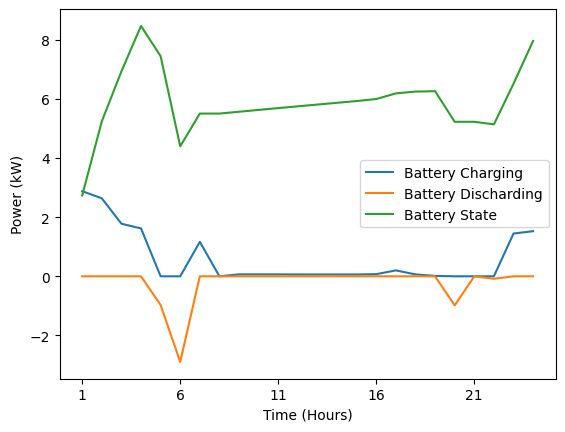

In [68]:
stor_ch_power.iloc[0][:24].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][:24].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][:24].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1/2 day) - Normal plot

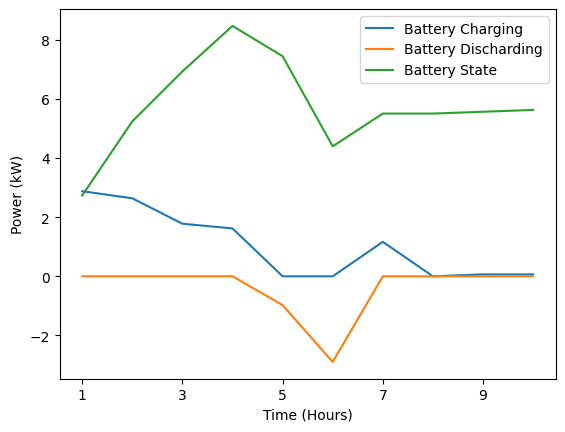

In [69]:
stor_ch_power.iloc[0][:24]

stor_ch_power.iloc[0][:10].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][:10].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][:10].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

##### Battery events and state (2 days) - Normal plot

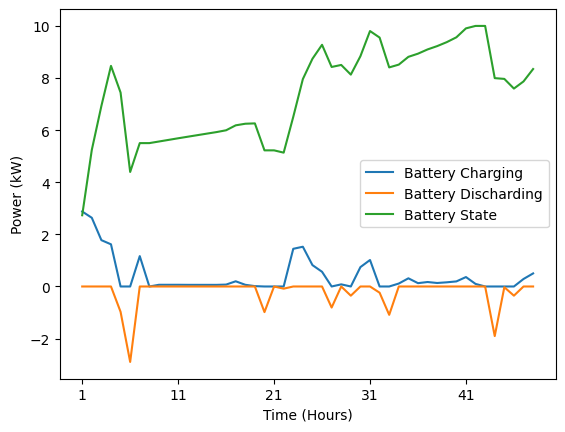

In [70]:
stor_ch_power.iloc[0][0:48].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][0:48].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][0:48].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1/2 day) with SOC in kWh

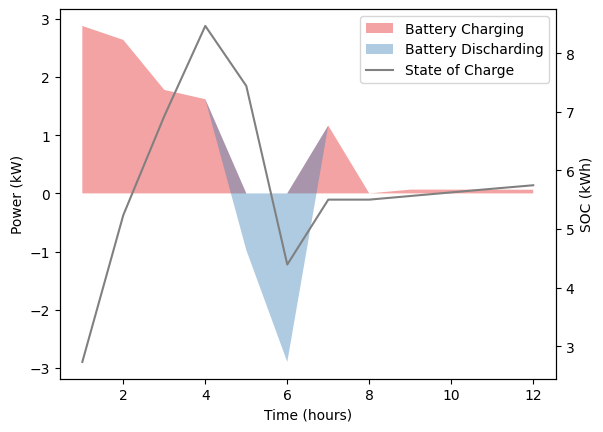

In [71]:
x = range(1,12+1)
y = [stor_ch_power.iloc[0][:12], stor_dch_power.iloc[0][:12]]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding'], colors=pal, alpha=0.4 )
lns2 = ax2.plot(x, stor_ener_state.iloc[0][:12], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (kWh)', color='black')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

#### Battery events and state (1/2 day) with SOC in %

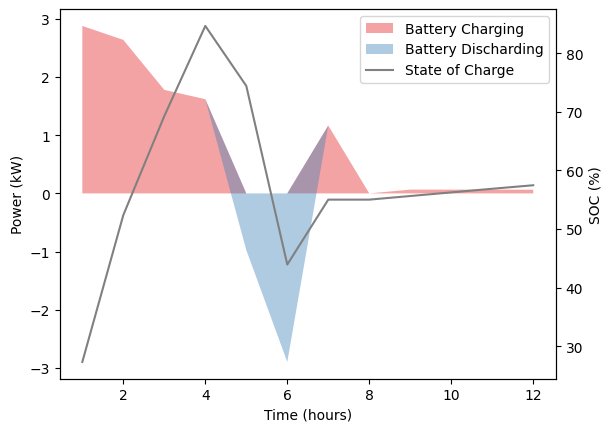

In [72]:
x = range(1,12+1)
y = [stor_ch_power.iloc[0][:12], stor_dch_power.iloc[0][:12]]
bat_capacity = 10

fig, ax1 = plt.subplots()

# Convert state of charge (SOC) from kWh to %
stor_ener_state.iloc[0][:] = stor_ener_state.iloc[0][:]/10*100

ax2 = ax1.twinx()
lns1 = ax1.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding'], colors=pal, alpha=0.4 )
lns2 = ax2.plot(x, stor_ener_state.iloc[0][:12], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (%)', color='black')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

### Create matlab file with the model info

In [73]:
spio.savemat("matlab_matrix.mat", data)

In [74]:
data2 = spio.loadmat("matlab_matrix.mat")

In [75]:
data2

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Nov  7 14:40:06 2022',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[(array([[(array([[168]]), array([[60]]), array([[2]]), array([[0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 1, 1, 1, 1, 1, 1],
                                [1, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0,

### Calculations for whole week

#### Battery

In [84]:
#for i in range(7):
    #print(str(24*i)+":"+str(24*(i+1)))
    #print(stor_ch_power.iloc[0][24*i:24*(i+1)].sum())

#Storage Charge
print("Storage Charge")
print([stor_ch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Storage Discharge
print("Storage Discharge")
print([stor_dch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#State of Charge
print("State of Charge")
print([stor_ener_state.iloc[0][24*i:24*(i+1)].mean() for i in range(7)])

Storage Charge
[13.84564136830085, 5.692508724715218, 8.421052771319502, 9.301061940731044, 8.936672618822907, 4.9938006285917655, 8.421053222286218]
Storage Discharge
[-4.933890480249231, -4.770667771532672, -9.191169909557388, -9.433098204239782, -8.500727478104437, -5.277961151988306, -2.19212644433246]
State of Charge
[58.823006327889914, 88.7016903587269, 60.36256952440397, 57.88398105016037, 53.63546100515668, 37.17618066574493, 50.89257615545898]


#### Consumption

In [77]:
#Houses
for j in range(5):
    print("House #" + str(j+1))
    print([loadLimit[:, :, 0][j, 24*i:24*(i+1)].sum() for i in range(7)])

#Battery Charging
print("Battery Charging")
print([stor_ch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

House #1
[6.98341375, 6.959977333333333, 6.3083208611111115, 4.650237333333333, 6.360426777777777, 6.289118916666666, 6.323955166666667]
House #2
[6.758666555555556, 4.487228833333333, 5.789941583333333, 6.51471861111111, 6.257622694444445, 6.841880027777778, 6.670462722222222]
House #3
[10.057154194444443, 11.852488194444444, 12.214380499999999, 11.97344961111111, 11.822720694444445, 11.5842415, 11.705031444444444]
House #4
[19.818160444444445, 20.00688025, 20.647060944444444, 17.970955583333335, 16.67186786111111, 20.471566083333332, 22.261792166666666]
House #5
[12.386107138888889, 12.502560666666666, 15.526787694444446, 13.202605861111111, 11.872343833333334, 12.381141027777778, 8.76556425]
Battery Charging
[13.84564136830085, 5.692508724715218, 8.421052771319502, 9.301061940731044, 8.936672618822907, 4.9938006285917655, 8.421053222286218]


#### Production

In [78]:
#PV Production
print("PV Production")
print([act_power.loc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Wind Production
print("Wind Production")
print([act_power.loc[1][24*i:24*(i+1)].sum() for i in range(7)])

#Battery Discharging
print("Battery Discharging")
print([stor_dch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Grid
print("Grid")
print([pimp["0"][24*i:24*(i+1)].sum() for i in range(7)])

PV Production
[14.70689671635552, 11.197309631626288, 26.60265026348847, 17.517876185061485, 21.158504401352662, 5.89267097183902, 2.3312281323859806e-08]
Wind Production
[38.307725983404, 29.764402097775474, 8.130703146853735, 14.207614834992635, 16.30624705314557, 39.6336358012787, 112.39061117150293]
Battery Discharging
[-4.933890480249231, -4.770667771532672, -9.191169909557388, -9.433098204239782, -8.500727478104437, -5.277961151988306, -2.19212644433246]
Grid
[11.900621086514889, 14.333879437549324, 16.49875292576927, 14.634369836012112, 13.99532312582603, 11.757465809144353, 4.454055224174722]
